# Исследование данных авиакомпании — проверить гипотезу о повышении
спроса во время фестивалей
## Описание проекта
Российская авиакомпания «F9» выполняет внутренние пассажирские авиаперевозки. Авиакомпания обеспечивает сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.
Описание данных

## Итоги проекта 
Проведена выгрузка и подготовка предоставленных данных авиакомпании средствами SQL. Проверена гипотеза о различии среднего спроса на билеты во время проведения различных фестивалей и в обычное время.

## База данных об авиаперевозках:
**Таблица airports — информация об аэропортах:**
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона

**Таблица aircrafts — информация о самолётах:**
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов

**Таблица tickets — информация о билетах:**
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира

**Таблица flights — информация о рейсах:**
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта

**Таблица ticket_flights — стыковая таблица «рейсы-билеты»**
- ticket_no — номер билета
- flight_id — идентификатор рейса

**Таблица festivals — информация о фестивалях**
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля

## Схема базы
<a href = https://pictures.s3.yandex.net/resources/photo_2019-11-08_14-08-31_1573733426.jpg><img src = 'https://pictures.s3.yandex.net/resources/photo_2019-11-08_14-08-31_1573733426.jpg' width = 80%></a>


# Оглавление <a href='' id='table_of_content'></a>
1. [Импорт данных](#header_1)
2. [Топ-10 городов по количеству рейсов](#header_5)
3. [Построение графиков](#header_6)
4. [Поиск и подготовка данных](#header_2)
    - [Парсинг информации о фестивалях с сайта](#header_3)
    - [Запросы к базе данных](#header_4)
    
    
5. [Выводы](#header_7)

## 1. Импорт данных <a href='' id = 'header_1'></a>
↑ [к оглавлению](#table_of_content)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Изучим датасеты. Датасеты были подготовлены заранее запросами к базе данных (информация об этом в разделе 4). В файле `/datasets/query_1.csv` содержится информация 
о количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года. В файле `/datasets/query_3.csv` содержитсят информация о среднем количестве прибывающих рейсов в день для каждого города за август 2018 года. 

In [2]:
model_stat = pd.read_csv('query_1.csv')
city_stat = pd.read_csv('query_3.csv')

In [3]:
model_stat

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
model_stat.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
#проверка наличия полных дубликатов (конечно, строк не так много и в целом и так видно, что дубликотов нет)
model_stat.duplicated().sum()

0

In [7]:
city_stat.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [8]:
city_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [9]:
#проверка наличия полных дубликатов
city_stat.duplicated().sum()

0

In [10]:
#проверка дублирования названия городов
city_stat.city.duplicated().sum()

0

## 2. Топ-10 городов по количеству рейсов <a href='' id = 'header_5'></a>
↑ [к оглавлению](#table_of_content)

In [11]:
top_cities = city_stat.sort_values(by = 'average_flights', ascending = False)[:10]  
top_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


В первую десятку ожидаемо попали попали крупные города. 

## 3. Построение графиков <a href='' id = 'header_6'></a>
↑ [к оглавлению](#table_of_content)

### 3.1. Модели самолетов и количество рейсов

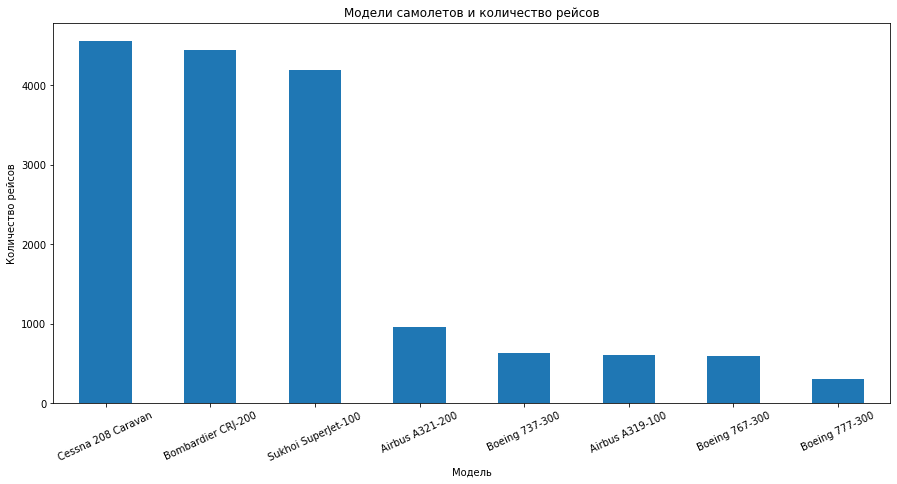

In [12]:
report = model_stat.sort_values(by = 'flights_amount', ascending = False)
report.plot(kind = 'bar', x = 'model', legend = False, figsize = (15,7))

plt.title('Модели самолетов и количество рейсов')
plt.xlabel('Модель')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=25)
plt.show()

In [13]:
#доля трех самым популярных моделей в общем количестве
part = model_stat.query('flights_amount > 1000')['flights_amount'].sum()/model_stat['flights_amount'].sum()
print('{:.2%}'.format(part))

80.98%


Заметно, что бюджетные модели самолетов участвуют в большей части рейсов. А именно 81% перевозок происходит на них. 

### 3.2. Города и количество рейсов

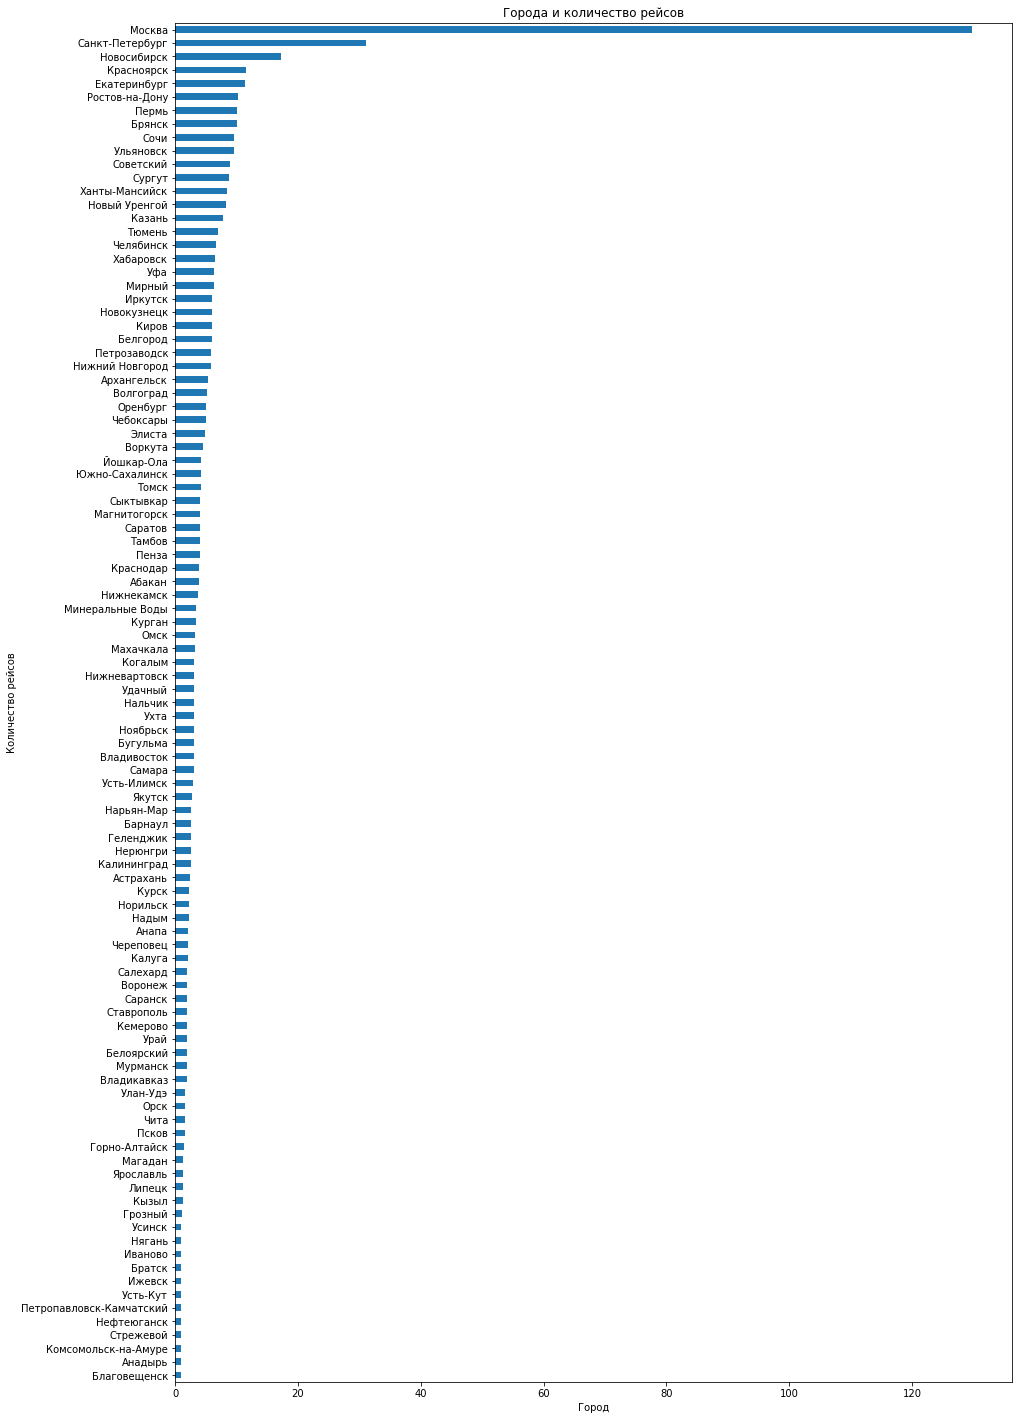

In [24]:
report = city_stat.sort_values(by = 'average_flights', ascending = True)
report.plot(kind = 'barh', x = 'city', legend = False, figsize = (15,25))

plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.show()

In [15]:
#доля прилетов в Москву
part = city_stat.query('city == "Москва"')['average_flights'].sum()/city_stat['average_flights'].sum()
print('{:.2%}'.format(part))

23.39%


### 3.3. Топ-10 городов и количество рейсов

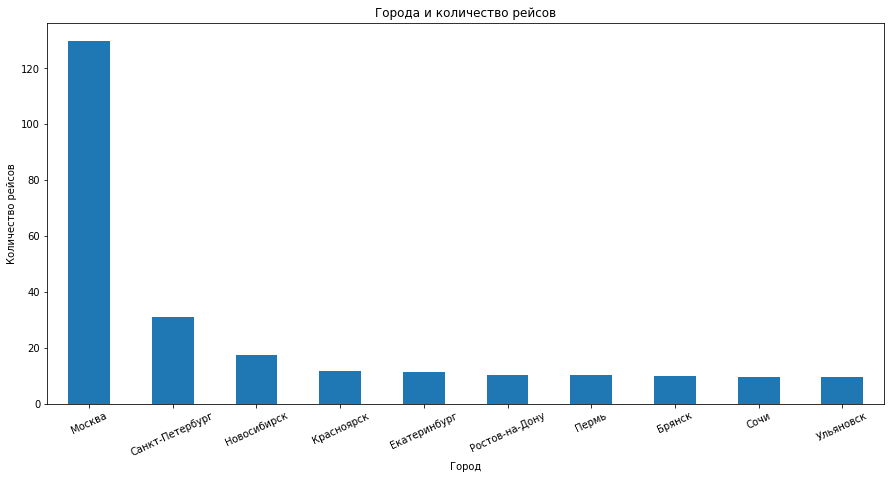

In [16]:
report = top_cities.sort_values(by = 'average_flights', ascending = False)
report.plot(kind = 'bar', x = 'city', legend = False, figsize = (15,7))

plt.title('Города и количество рейсов')
plt.xlabel('Город')
plt.ylabel('Количество рейсов')
plt.xticks(rotation=25)
plt.show()

In [17]:
#доля прилетов в Москву среди топ-10
part = top_cities.query('city == "Москва"')['average_flights'].sum()/top_cities['average_flights'].sum()
print('{:.2%}'.format(part))

51.77%


## 4. Поиск и подготовка данных <a href='' id = 'header_2'></a>

### 4.1. Парсинг информации о фестивалях с сайта <a href='' id = 'header_3'></a>
↑ [к оглавлению](#table_of_content)

Данные о фестивалях взяты с сайта https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

In [19]:
#!pip install bs4
#!pip install lxml

import requests
from bs4 import BeautifulSoup
import pandas as pd
URL = 'https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, "lxml")

# parsing headers using list comprehension
headers = [table_header.text for table_header in soup.find_all('th')]

# create DataFrame
festivals = pd.DataFrame(columns = headers)

td = soup.find_all('td')
names = [td[i].text for i in range(0, len(td), 3)]
cities = [td[i].text for i in range(1, len(td), 3)]
dates = [td[i].text for i in range(2, len(td), 3)]

festivals['Название фестиваля'] = names
festivals['Место проведения'] = cities
festivals['Дата проведения'] = dates
festivals

,Название фестиваля,Место проведения,Дата проведения
0,Музыкальный фестиваль «Усадьба Jazz»,Екатеринбург,01.07.2018
1,Фестиваль музыки и технологий Alfa Future People,Нижний Новгород,10.08.2018
2,"Фестиваль еды «О, да! Еда!»",Санкт-Петербург,21.07.2018
3,Доброфест,Ярославль,29.07.2018
4,Park Live,Москва,28.07.2018
5,Пикник Афиши,Москва,04.08.2018
6,VK FEST,Санкт-Петербург,29.07.2018
7,"Фестиваль «О, да! Еда!»",Иркутск,25.08.2018
8,"Фестиваль «О, да! Еда!»",Владивосток,02.09.2018
9,Видфест,Москва,08.09.2018


### 4.2. Запросы к базе данных <a href='' id = 'header_4'></a>
↑ [к оглавлению](#table_of_content)

Количестве рейсов на каждой модели самолёта с вылетом в сентябре 2018 года.

``` sql
SELECT 
    aircrafts.model,
    COUNT(flight_id) as flights_amount
FROM flights 
    LEFT JOIN aircrafts 
    on flights.aircraft_code = aircrafts.aircraft_code
WHERE flights.departure_time::date BETWEEN '2018-09-01' and '2018-09-30'
GROUP BY aircrafts.model
    
```

Cреднее количество прибывающих рейсов в день для каждого города за август 2018 года.

```sql
SELECT 
    city,
    AVG(cnt) as average_flights
FROM (
        SELECT
            airports.city,
            EXTRACT(day FROM arrival_time::date) as day,
            COUNT(flight_id) as cnt
        FROM flights
            INNER JOIN airports 
            ON flights.arrival_airport = airports.airport_code
        WHERE flights.departure_time::date BETWEEN '2018-08-01' and '2018-08-31'
        GROUP BY airports.city, day
) as subq
GROUP BY city
```

## 5. Выводы <a href='' id = 'header_7'></a>

Во время фестивалей спрос на перелеты практически не меняется.